### Ensemble Techniques Project
#### Submitted by Faraz Ali

In [1]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; warnings.filterwarnings('ignore') #to suppress unnecessary warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Data Understanding and Exploration:ks]

#### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.
#### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.
#### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame.
#### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [2]:
# Import CSV file
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
# Show imported dataframe head
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [3]:
# Import CSV file
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
# Show imported dataframe head
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Merge df1 and df2 to single dataframe named customer_data
customer_data = pd.merge(df1,df2,on='customerID')
# Show merged dataframe
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Column names in df1
df1_columns = list(df1.columns)
df1_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity']

In [6]:
# Column names in df2
df2_columns = list(df2.columns)
# Remove 'customerID' from the list as it is repeated
del df2_columns[0]
df2_columns

['OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
# Combine columns from both dataframes
all_columns = df1_columns + df2_columns
all_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [8]:
# Column names in customer_data
customer_data_columns = list(customer_data.columns)
customer_data_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
# Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.
if customer_data_columns == all_columns:
    print("All Columns Incorporated!")
else:
    print("Some columns are missing.")

All Columns Incorporated!


### 2. Data Cleaning & Analysis:

##### A. Impute missing/unexpected values in the DataFrame. [2 Marks]
##### B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
[For Example: MonthlyCharges, TotalCharges]
##### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentagedistribution in the pie-chart. [4 Marks]
##### D. Share insights for Q2.c. [2 Marks]
##### E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]
##### F. Split the data into 80% train and 20% test. [1 Marks]
##### G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

In [10]:
# Check datatype of all columns
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Replace empty places with NaN
customer_data = customer_data.replace(' ',np.nan)
# Check for missing values in the merged dataframe
customer_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# There are 11 empty values in the column 'TotalCharges'
# Check for different unexpected categories in other columns
for col in customer_data.columns:
    temp = customer_data[col].value_counts()
    print(temp)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    15

In [13]:
# Drop empty values from the dataframe
customer_data = customer_data.dropna(axis=0).reset_index()
customer_data.isnull().sum()

index               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# First, let's convert the columns with an 'object' datatype into categorical variables
for feature in customer_data.columns: # Loop through all columns in the dataframe
    if customer_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        customer_data[feature] = pd.Categorical(customer_data[feature])# Replace strings with an integer
customer_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [15]:
# 'SeniorCitizen' is also a category. Let's change it.
customer_data['SeniorCitizen'] = pd.Categorical(customer_data.SeniorCitizen)
customer_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [16]:
# Change datatype of 'TotalCharges' to float
customer_data.TotalCharges = customer_data.TotalCharges.astype(float)
customer_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [17]:
def piechart(dataframe):  # Define Function
    df_pie = dataframe.select_dtypes(include=['category']).drop(columns=['customerID'], errors='ignore')    
    num_cols = df_pie.shape[1]
    fig, axes = plt.subplots(num_cols, 1, figsize=(4, num_cols * 3))  # Adjust figsize for smaller charts

    if num_cols == 1:
        axes = [axes]  # Ensure axes is iterable for a single plot

    for ax, col in zip(axes, df_pie.columns):
        counts = df_pie[col].value_counts().fillna(0)
        counts.plot(kind='pie', autopct='%1.1f%%', fontsize=10, ax=ax, title=col)
        ax.set_ylabel('')  # Hide the y-label

    plt.tight_layout()
    plt.show()

print('Call piechart(dataframe_name) function to plot pie charts.')

Call piechart(dataframe_name) function to plot pie charts.


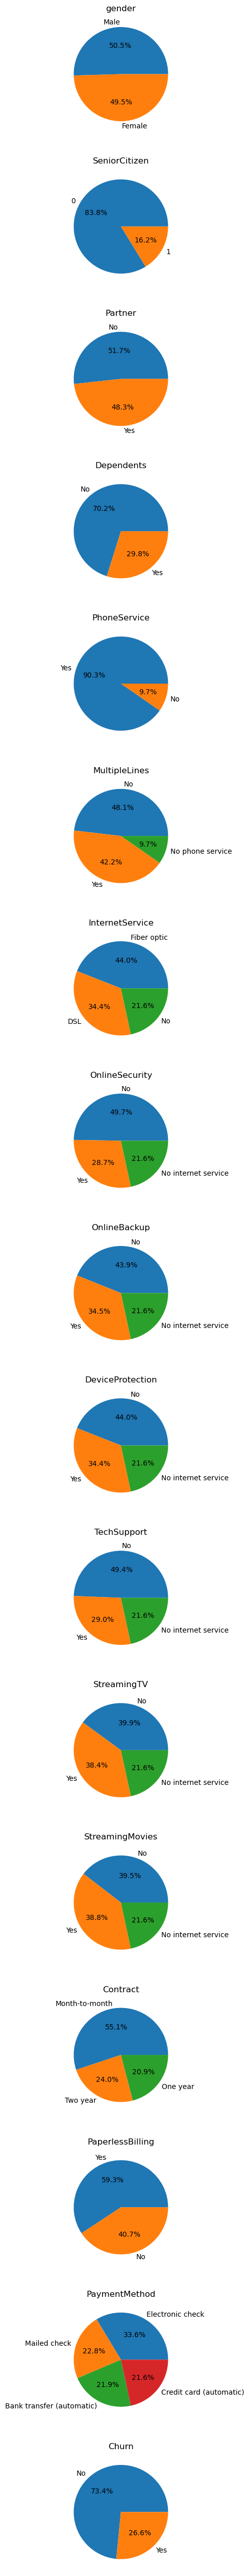

In [18]:
# Call Function and Pass DataDrame
piechart(customer_data)

#### Observations:
1.	Gender is equally balanced between Male and Female
2.	There are lesser senior citizens in the dataset
3.	The Partners category is equally distributed between those having partners and those not having partners
4.	Most people do not have dependents
5.	90% people have Phone Service
6.	Among those having phone service, 42% have multiple lines
7.	44% people have Fiber optic internet service
8.	50% people have Online Security
9.	44% people don't have an online backup
10.	44% people have no device protection
11.	50% people don't get tech support
12.	People streaming TV and not streaming TV are almost equal
13.	People streaming movies and not streaming movies are almost equal
14.	Maximum people (55%) prefer month-to-month contract
15.	Maximum people prefer paperless billing
16.	33% people prefer electronic checks to make payments. Other payment methods are almost equally distributed
17.	Majority (73%) peope did not churn
le did not churnle did not churn

In [19]:
# Create a dataframe copy
df = customer_data
df.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# Drop 'index' and 'customerID', 'Churn' columns
df.drop(columns=['index', 'customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Independent Variables
X = df.drop(columns=['Churn'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [22]:
# Encode categorical variables
# Using Get Dummies method
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [23]:
# Dependent/Target Variable
Y = df['Churn']
Y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: category
Categories (2, object): ['No', 'Yes']

In [24]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=.20, random_state=10)

X_train.shape, X_test.shape

((5625, 30), (1407, 30))

In [25]:
# Standardize Training Data
# Import Library
from sklearn.preprocessing import StandardScaler
# Define method
scaler = StandardScaler()
# Perform standardization
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalized_x_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.297499,0.861739,-0.978569,0.980109,-0.443918,-0.967979,1.516285,0.326876,-0.326876,-0.858594,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,-0.561404,0.822862,-0.531223,1.414779,-0.541665
1,-0.521791,0.840135,-0.233205,0.980109,-0.443918,1.033080,1.516285,0.326876,-0.326876,-0.858594,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,-0.561404,0.822862,-0.531223,1.414779,-0.541665
2,1.560372,1.072790,2.036780,0.980109,-0.443918,1.033080,1.516285,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,-0.531223,1.414779,-0.541665
3,1.356239,-1.178976,-0.141853,0.980109,-0.443918,-0.967979,-0.659507,-3.059267,3.059267,-0.858594,...,-0.525166,-0.794595,-0.525166,-0.801159,1.947129,-0.561404,-1.215271,1.882450,-0.706824,-0.541665
4,-0.399311,0.870048,-0.046720,-1.020295,-0.443918,1.033080,1.516285,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,1.882450,-0.706824,-0.541665


In [26]:
# Standardize Test Data
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
normalized_x_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.072697,-1.478104,-0.736393,0.980109,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,1.781249,-1.215271,-0.531223,-0.706824,1.846160
1,1.601199,-1.326878,-0.201081,-1.020295,-0.443918,1.033080,-0.659507,0.326876,-0.326876,1.164695,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,1.781249,-1.215271,1.882450,-0.706824,-0.541665
2,-0.766751,-0.193517,-0.677010,-1.020295,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,-0.525166,-0.794595,-0.525166,1.248191,1.947129,-0.561404,-1.215271,1.882450,-0.706824,-0.541665
3,-0.480964,-1.494722,-0.834621,0.980109,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,-0.561404,0.822862,-0.531223,-0.706824,1.846160
4,1.601199,0.637393,1.691601,-1.020295,2.252668,1.033080,-0.659507,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,1.882450,-0.706824,-0.541665


#### 3. Model building and Improvement:

In [27]:
#Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [28]:
#scoring decision Tree

print('accuracy score of decision tree Train set is',dTree.score(X_train, y_train))
print('accuracy score of decision tree Test set is', dTree.score(X_test, y_test))

accuracy score of decision tree Train set is 0.9978666666666667
accuracy score of decision tree Test set is 0.7277896233120114


##### Training set score is almost about 1 where as Test set score is about 72.7%

In [29]:
#Reducing Overfitting

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)

print('accuracy score of Pruned decision tree Train set is', dTreeR.score(X_train, y_train))
print('accuracy score of Pruned decision tree Test  set is',dTreeR.score(X_test, y_test))

accuracy score of Pruned decision tree Train set is 0.7884444444444444
accuracy score of Pruned decision tree Test  set is 0.7960199004975125


##### With pruning by including max_depth=3, Got trainig score of 78.84 and Testing score of 79.60

<Axes: >

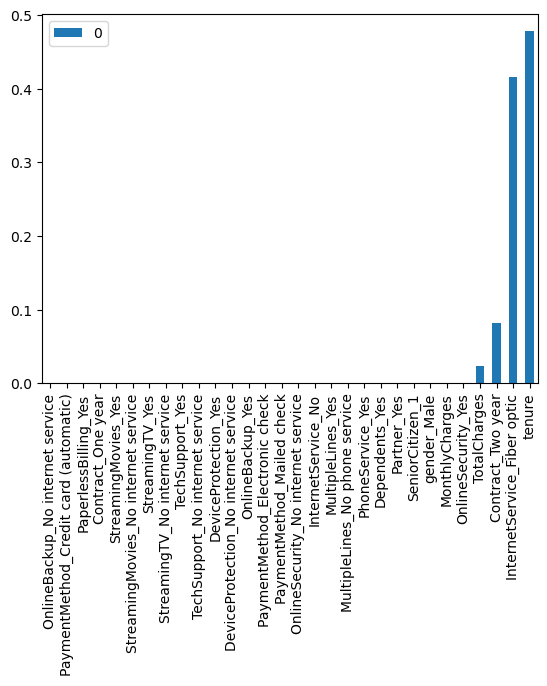

In [30]:
# importance of features in the tree building (The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

#print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))
weights= pd.DataFrame(dTreeR.feature_importances_, index = X_train.columns)
weights.sort_values(by=0).plot(kind = 'bar')

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree classifier
dTree = DecisionTreeClassifier(random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dTree, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dTree = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max

Training Performance:
              precision    recall  f1-score   support

          No       0.86      0.93      0.89      4117
         Yes       0.75      0.59      0.66      1508

    accuracy                           0.84      5625
   macro avg       0.81      0.76      0.78      5625
weighted avg       0.83      0.84      0.83      5625

ROC AUC Score (Train): 0.912319141245879

Testing Performance:
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1046
         Yes       0.62      0.52      0.57       361

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

ROC AUC Score (Test): 0.7978421953041


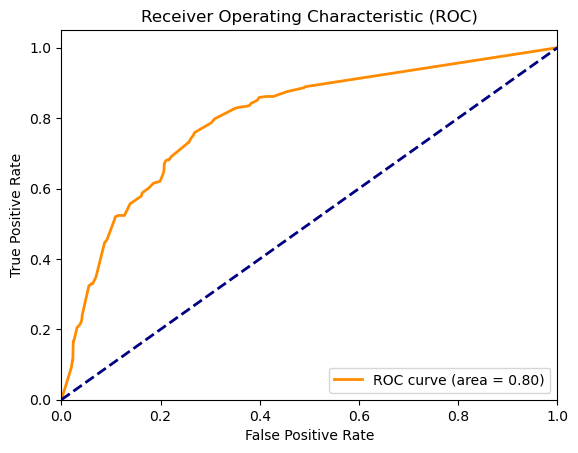

In [32]:
# Predict on training data
y_train_pred = best_dTree.predict(X_train)
y_train_pred_prob = best_dTree.predict_proba(X_train)[:, 1]

# Predict on test data
y_test_pred = best_dTree.predict(X_test)
y_test_pred_prob = best_dTree.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Training Performance:")
print(classification_report(y_train, y_train_pred))
print("ROC AUC Score (Train):", roc_auc_score(y_train, y_train_pred_prob))

print("\nTesting Performance:")
print(classification_report(y_test, y_test_pred))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_test_pred_prob))

# Plot ROC curve for test data
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob, pos_label='Yes')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [33]:
# Performance of initial model
dTree_initial = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree_initial.fit(X_train, y_train)
y_test_pred_initial_prob = dTree_initial.predict_proba(X_test)[:, 1]

# Calculate ROC AUC for initial model
initial_roc_auc = roc_auc_score(y_test, y_test_pred_initial_prob)

print(f'Initial model ROC AUC score: {initial_roc_auc}')
print(f'Tuned model ROC AUC score: {roc_auc_score(y_test, y_test_pred_prob)}')

Initial model ROC AUC score: 0.6499578926182317
Tuned model ROC AUC score: 0.7978421953041


#### Simple Random Forest

In [34]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', oob_score=True, class_weight='balanced', random_state=1)

In [35]:
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.9976888888888888

#### This score is useless because it is overfitting the training dataset. Instead use oob_score to understand it's actual score

In [36]:
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.8002842928216063

In [37]:
print('Score: ', rfc.oob_score_)

Score:  0.7852444444444444


In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[930 116]
 [165 196]]
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1046
         Yes       0.63      0.54      0.58       361

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



#### Random Forest with Hyperparameter Tuning

In [39]:
n_estimators = np.arange(10, 50, 10)
max_features = ['auto', 'sqrt', 'log2']

In [40]:
hyperparameters = dict(max_features = max_features, n_estimators=n_estimators)

In [41]:
clf = GridSearchCV(rfc, hyperparameters, cv=10, verbose=0)

In [42]:
best_model = clf.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.7924662402274343

In [43]:
y_pred = best_model.predict(X_test)

In [44]:
print('n_estimators : ', best_model.best_estimator_.get_params()['n_estimators'])
print('max_features : ', best_model.best_estimator_.get_params()['max_features'])

n_estimators :  20
max_features :  log2


In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[931 115]
 [177 184]]
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1046
         Yes       0.62      0.51      0.56       361

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



#### Bagging Algorithms

In [46]:
bc = BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)

In [47]:
bc.fit(X_train, y_train)
bc.score(X_train, y_train)

0.9818666666666667

In [48]:
y_pred = bc.predict(X_test)
bc.score(X_test, y_test)

0.7917555081734187

In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[925 121]
 [172 189]]
              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1046
         Yes       0.61      0.52      0.56       361

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



#### Bagging Classifier with Hyperparameter Tuning

In [50]:
n_estimators = np.arange(10,50,10)
max_samples = np.arange(0.7, 0.8, 0.05)

In [51]:
hyperparameters = dict(n_estimators=n_estimators, max_samples=max_samples)

In [52]:
clf = GridSearchCV(bc, hyperparameters, cv=5, verbose=0)

In [53]:
best_model = clf.fit(X_train, y_train)
best_model.score(X_train, y_train)

0.9694222222222222

In [54]:
y_pred = best_model.predict(X_test)
best_model.score(X_test, y_test)

0.7931769722814499

In [55]:
print("n_estimators : ",best_model.best_estimator_.get_params()['n_estimators'])
print("max_samples : ",best_model.best_estimator_.get_params()['max_samples'])

n_estimators :  20
max_samples :  0.7


In [56]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[929 117]
 [174 187]]
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1046
         Yes       0.62      0.52      0.56       361

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



#### Extra Trees Classifier

In [57]:
etc = ExtraTreesClassifier(n_estimators = 20, criterion='entropy', max_features='auto', min_samples_split=2, bootstrap=True, oob_score=True)

In [58]:
# Instantiate the ExtraTreesClassifier with a valid max_features parameter
etc = ExtraTreesClassifier(max_features='sqrt', random_state=1)

# Train the model
etc.fit(X_train, y_train)
etc.score(X_train, y_train)

0.9978666666666667

In [59]:
y_pred = etc.predict(X_test)
etc.score(X_test, y_test)

0.7796730632551528

In [60]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[899 147]
 [163 198]]
              precision    recall  f1-score   support

          No       0.85      0.86      0.85      1046
         Yes       0.57      0.55      0.56       361

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



#### Ada Boosting Classifier

In [61]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)

In [62]:
abc.fit(X_train, y_train)
abc.score(X_train, y_train)

0.8049777777777778

In [63]:
y_pred = abc.predict(X_test)
abc.score(X_test, y_test)

0.8088130774697939

In [64]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[941 105]
 [164 197]]
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1046
         Yes       0.65      0.55      0.59       361

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



#### Ada Boosting Classifier With Hyperparameter Tuning

In [65]:
n_estimators = np.arange(30,100,10)
learning_rate = np.arange(0.1,1,0.5)

In [66]:
hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate)

In [67]:
clf = GridSearchCV(abc, hyperparameters, cv=3)

In [68]:
best_model = clf.fit(X_train, y_train)
best_model.score(X_train, y_train)

0.8044444444444444

In [69]:
y_pred = best_model.predict(X_test)
best_model.score(X_test, y_test)

0.8095238095238095

In [70]:
print('n_estimators : ', best_model.best_estimator_.get_params()['n_estimators'])
print('learning_rate : ', best_model.best_estimator_.get_params()['learning_rate'])

n_estimators :  40
learning_rate :  0.6


#### Gradient Descent Boosting Classifier

In [71]:
# Instantiate the GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss='log_loss', n_estimators=40, learning_rate=0.6, validation_fraction=0.2, random_state=1)

In [72]:
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train)

0.8424888888888888

In [73]:
y_pred = gbc.predict(X_test)
gbc.score(X_test, y_test)

0.7953091684434968

In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[919 127]
 [161 200]]
              precision    recall  f1-score   support

          No       0.85      0.88      0.86      1046
         Yes       0.61      0.55      0.58       361

    accuracy                           0.80      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.80      0.79      1407



#### Gradient Descent Boosting Classifier with Hyperparameter Tuning

In [75]:
n_estimators = np.arange(30,100,10)
learning_rate = np.arange(0.1,1,0.5)

In [76]:
hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate)

In [77]:
clf = GridSearchCV(gbc, hyperparameters, cv=3)

In [78]:
best_model = clf.fit(X_train, y_train)
best_model.score(X_train, y_train)

0.8062222222222222

In [79]:
y_pred = best_model.predict(X_test)
best_model.score(X_test, y_test)

0.8081023454157783

In [80]:
print('n_estimators : ', best_model.best_estimator_.get_params()['n_estimators'])
print('learning_rate : ', best_model.best_estimator_.get_params()['learning_rate'])

n_estimators :  40
learning_rate :  0.1


#### Stacking

In [81]:
stack = VotingClassifier(estimators=[('gbc',gbc),('abc',abc)], voting='hard')

In [82]:
for clf, label in zip([gbc, abc], ['Gradient Boosting', 'Ada Boosting']):
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.79 (+/- 0.01) [Gradient Boosting]
Accuracy: 0.80 (+/- 0.01) [Ada Boosting]


#### Conclusion

Every model we tried did its respective job, however I liked the Gradient Descent Boosting Classifier with Hyperparameter Tuning model more for its close proximity to predict between test and train data.

#### Improvements

We can always try to improve the models. The fuel of machine learning models is data so if we can collect more data, it is always helpful in improving the model. We can also try a wider range of parameters in GridSearchCV because a little adjustment in a parameter may slighlty increase the model.

Finally, we can try more robust or advanced models. Please keep in mind that there will be a trade-off when making such kind of decisions

. Advanced models may increase the accuracy but they require more data and more computing power.